In [15]:
! pip install pygam

     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------------------------------- ------ 51.2/61.0 kB 890.4 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 819.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/522.0 kB ? eta -:--:--
   -- ------------------------------------- 30.7/522.0 kB 1.3 MB/s eta 0:00:01
   ---- ---------------------------------- 61.4/522.0 kB 825.8 kB/s eta 0:00:01
   -------- ----------------------------- 112.6/522.0 kB 819.2 kB/s eta 0:00:01
   ---------- --------------------------- 143.4/522.0 kB 853.3 kB/s eta 0:00:01
   ------------ ------------------------- 174.1/522.0 kB 807.1 kB/s eta 0:00:01
   -------------- ----------------------- 204.8/522.0 kB 778.2 kB/s eta 0:00:01
   ----------------- -------------------- 235.5/522.0 kB 758.5 kB/s eta 0:00:01
   -------------------- ----------------- 286.7/522.0 kB 737.3 kB

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.5.1 requires numpy<1.24,>=1.16.0, but you have numpy 1.26.4 which is incompatible.
ydata-profiling 4.5.1 requires pydantic<2,>=1.8.1, but you have pydantic 2.4.2 which is incompatible.
autoviz 0.1.808 requires numpy<1.25.0, but you have numpy 1.26.4 which is incompatible.
numba 0.58.0 requires numpy<1.26,>=1.21, but you have numpy 1.26.4 which is incompatible.
tensorflow-intel 2.13.0 requires numpy<=1.24.3,>=1.22, but you have numpy 1.26.4 which is incompatible.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.11.0 which is incompatible.

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Import Libraries

In [ ]:
import numpy as np
import pandas as pd

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pygam import LinearGAM
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset


In [4]:
data = pd.read_excel('data.xlsx')

data.head(10)

,Platform,business_id,city,state,postal_code,score,review_count,Gender,CEO_sch_cat,CEO_grd_yr,...,ZIP Code,Business_ID_other,Rural_metropolitan_Desc,Tot_Clms_Services,Brnd_Tot_Clms_Services,Gnrc_Tot_Clms_Services,Othr_Tot_Clms_Services,LIS_Tot_Clms_Services,Opioid_Tot_Clms_Services,Antbtc_Tot_Clms_Services
0,Platform 1,1770720401,Santa Barbara,CA,93101,5.0,7,F,108,1997.0,...,931032109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Platform 1,1699268318,Clearwater,FL,33755,5.0,10,F,108,2017.0,...,337631726,1.699268e+09,Metropolitan area core: primary flow within an...,971.0,138.0,813.0,20.0,762.0,NaN,31.0
2,Platform 1,1336331669,Bala Cynwyd,PA,19004,4.0,13,M,108,1986.0,...,190043207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Platform 1,1528008463,Plymouth Meeting,PA,19462,2.5,8,M,138,1980.0,...,194621718,1.528008e+09,Metropolitan area core: primary flow within an...,1988.0,NaN,1674.0,NaN,65.0,NaN,274.0
4,Platform 1,1366867269,Voorhees,NJ,8043,3.5,17,F,116,2014.0,...,80434509,1.366867e+09,Metropolitan area core: primary flow within an...,847.0,73.0,774.0,0.0,75.0,50.0,NaN
5,Platform 1,1689735383,Tarpon Springs,FL,34689,2.0,29,M,170,1988.0,...,346893790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Platform 1,1356471593,Tampa,FL,33607,3.0,36,M,116,1992.0,...,805162422,1.356472e+09,Metropolitan area core: primary flow within an...,869.0,103.0,766.0,0.0,106.0,33.0,25.0
7,Platform 1,1023598968,Brownsburg,IN,46112,1.5,14,M,108,2018.0,...,461121031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Platform 1,1316037153,Tucson,AZ,85718,2.5,43,M,3,1992.0,...,104672401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Platform 1,1902048259,Saint Petersburg,FL,33713,1.5,6,M,201,2009.0,...,337051300,1.902048e+09,Metropolitan area core: primary flow within an...,24.0,11.0,13.0,0.0,0.0,0.0,0.0


# Data Details

In [5]:
data.columns

Index(['Platform', 'business_id', 'city', 'state', 'postal_code', 'score',
       'review_count', 'Gender', 'CEO_sch_cat', 'CEO_grd_yr', 'field_cat',
       'ZIP Code', 'Business_ID_other', 'Rural_metropolitan_Desc',
       'Tot_Clms_Services', 'Brnd_Tot_Clms_Services', 'Gnrc_Tot_Clms_Services',
       'Othr_Tot_Clms_Services', 'LIS_Tot_Clms_Services',
       'Opioid_Tot_Clms_Services', 'Antbtc_Tot_Clms_Services'],
      dtype='object')

In [7]:
data.describe()

,business_id,score,review_count,CEO_sch_cat,CEO_grd_yr,field_cat,ZIP Code,Business_ID_other,Tot_Clms_Services,Brnd_Tot_Clms_Services,Gnrc_Tot_Clms_Services,Othr_Tot_Clms_Services,LIS_Tot_Clms_Services,Opioid_Tot_Clms_Services,Antbtc_Tot_Clms_Services
count,1.089100e+04,10891.000000,10891.000000,10891.000000,10883.000000,10891.000000,1.089100e+04,5.972000e+03,5972.000000,3381.000000,5905.000000,3370.000000,4993.000000,4437.000000,4104.000000
mean,1.508429e+09,3.491094,15.492058,119.815995,2003.567123,37.321458,4.556338e+08,1.498723e+09,1385.228567,313.112689,1162.889077,16.085757,637.495293,73.534145,72.947125
std,2.769638e+08,1.072750,19.330906,45.570808,12.408939,20.639548,2.779539e+08,2.734814e+08,2699.951669,580.514365,2295.809344,49.213090,1732.955977,242.297587,98.750373
min,1.003019e+09,1.000000,5.000000,0.000000,1956.000000,0.000000,6.488000e+03,1.003051e+09,11.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000
25%,1.285817e+09,2.500000,6.000000,108.000000,1997.000000,18.000000,1.934113e+08,1.265789e+09,98.000000,18.000000,85.000000,0.000000,43.000000,0.000000,20.000000
50%,1.508851e+09,3.500000,10.000000,108.000000,2004.000000,45.000000,3.702757e+08,1.497780e+09,337.000000,79.000000,268.000000,0.000000,120.000000,14.000000,38.000000
75%,1.760076e+09,4.500000,17.000000,134.000000,2014.000000,58.000000,7.011519e+08,1.720086e+09,1454.000000,364.000000,1181.000000,0.000000,572.000000,52.000000,96.000000
max,1.992998e+09,5.000000,413.000000,226.000000,2023.000000,76.000000,9.980178e+08,1.992953e+09,45742.000000,8888.000000,38693.000000,1218.000000,40132.000000,5317.000000,1499.000000


# Data Exploration and Cleaning


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10891 entries, 0 to 10890
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Platform                  10891 non-null  object 
 1   business_id               10891 non-null  int64  
 2   city                      10891 non-null  object 
 3   state                     10891 non-null  object 
 4   postal_code               10890 non-null  object 
 5   score                     10891 non-null  float64
 6   review_count              10891 non-null  int64  
 7   Gender                    10891 non-null  object 
 8   CEO_sch_cat               10891 non-null  int64  
 9   CEO_grd_yr                10883 non-null  float64
 10  field_cat                 10891 non-null  int64  
 11  ZIP Code                  10891 non-null  int64  
 12  Business_ID_other         5972 non-null   float64
 13  Rural_metropolitan_Desc   5971 non-null   object 
 14  Tot_Cl

In [12]:
data.isnull().sum()

Platform                       0
business_id                    0
city                           0
state                          0
postal_code                    1
score                          0
review_count                   0
Gender                         0
CEO_sch_cat                    0
CEO_grd_yr                     8
field_cat                      0
ZIP Code                       0
Business_ID_other           4919
Rural_metropolitan_Desc     4920
Tot_Clms_Services           4919
Brnd_Tot_Clms_Services      7510
Gnrc_Tot_Clms_Services      4986
Othr_Tot_Clms_Services      7521
LIS_Tot_Clms_Services       5898
Opioid_Tot_Clms_Services    6454
Antbtc_Tot_Clms_Services    6787
dtype: int64

In [13]:
len(data)

10891

# Handling missing values


In [17]:
data['postal_code'].fillna(data['postal_code'].mode()[0], inplace=True)
data['CEO_grd_yr'].fillna(data['CEO_grd_yr'].median(), inplace=True)

data

,Platform,business_id,city,state,postal_code,score,review_count,Gender,CEO_sch_cat,CEO_grd_yr,...,ZIP Code,Business_ID_other,Rural_metropolitan_Desc,Tot_Clms_Services,Brnd_Tot_Clms_Services,Gnrc_Tot_Clms_Services,Othr_Tot_Clms_Services,LIS_Tot_Clms_Services,Opioid_Tot_Clms_Services,Antbtc_Tot_Clms_Services
0,Platform 1,1770720401,Santa Barbara,CA,93101,5.0,7,F,108,1997.0,...,931032109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Platform 1,1699268318,Clearwater,FL,33755,5.0,10,F,108,2017.0,...,337631726,1.699268e+09,Metropolitan area core: primary flow within an...,971.0,138.0,813.0,20.0,762.0,NaN,31.0
2,Platform 1,1336331669,Bala Cynwyd,PA,19004,4.0,13,M,108,1986.0,...,190043207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Platform 1,1528008463,Plymouth Meeting,PA,19462,2.5,8,M,138,1980.0,...,194621718,1.528008e+09,Metropolitan area core: primary flow within an...,1988.0,NaN,1674.0,NaN,65.0,NaN,274.0
4,Platform 1,1366867269,Voorhees,NJ,8043,3.5,17,F,116,2014.0,...,80434509,1.366867e+09,Metropolitan area core: primary flow within an...,847.0,73.0,774.0,0.0,75.0,50.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10886,Platform 1,1518938117,Santa Barbara,CA,93101,4.5,15,F,128,1997.0,...,931018417,1.518938e+09,Metropolitan area core: primary flow within an...,141.0,81.0,60.0,0.0,NaN,0.0,NaN
10887,Platform 1,1649837246,Maryland Heights,MO,63043,2.5,7,F,108,2018.0,...,630432208,1.649837e+09,Metropolitan area core: primary flow within an...,297.0,18.0,279.0,0.0,84.0,0.0,121.0
10888,Platform 1,1740616986,Reno,NV,89503,3.5,20,F,108,2015.0,...,895025000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10889,Platform 1,1437123254,Saint Louis,MO,63131,4.5,7,M,126,2004.0,...,631171811,1.437123e+09,Metropolitan area core: primary flow within an...,2723.0,NaN,1785.0,NaN,646.0,NaN,23.0


# Data preprocessing


In [18]:
data.drop(['Business_ID_other', 'Rural_metropolitan_Desc', 'Tot_Clms_Services', 'Brnd_Tot_Clms_Services',
           'Gnrc_Tot_Clms_Services', 'Othr_Tot_Clms_Services', 'LIS_Tot_Clms_Services',
           'Opioid_Tot_Clms_Services', 'Antbtc_Tot_Clms_Services'], axis=1, inplace=True)
data.dropna(inplace=True)

data

,Platform,business_id,city,state,postal_code,score,review_count,Gender,CEO_sch_cat,CEO_grd_yr,field_cat,ZIP Code
0,Platform 1,1770720401,Santa Barbara,CA,93101,5.0,7,F,108,1997.0,13,931032109
1,Platform 1,1699268318,Clearwater,FL,33755,5.0,10,F,108,2017.0,21,337631726
2,Platform 1,1336331669,Bala Cynwyd,PA,19004,4.0,13,M,108,1986.0,12,190043207
3,Platform 1,1528008463,Plymouth Meeting,PA,19462,2.5,8,M,138,1980.0,75,194621718
4,Platform 1,1366867269,Voorhees,NJ,8043,3.5,17,F,116,2014.0,69,80434509
...,...,...,...,...,...,...,...,...,...,...,...,...
10886,Platform 1,1518938117,Santa Barbara,CA,93101,4.5,15,F,128,1997.0,49,931018417
10887,Platform 1,1649837246,Maryland Heights,MO,63043,2.5,7,F,108,2018.0,59,630432208
10888,Platform 1,1740616986,Reno,NV,89503,3.5,20,F,108,2015.0,13,895025000
10889,Platform 1,1437123254,Saint Louis,MO,63131,4.5,7,M,126,2004.0,5,631171811


# Lasso Regression Analysis


In [19]:
X = data[['review_count', 'CEO_grd_yr']]
y = data['score']

print(X, y)

       review_count  CEO_grd_yr
0                 7      1997.0
1                10      2017.0
2                13      1986.0
3                 8      1980.0
4                17      2014.0
...             ...         ...
10886            15      1997.0
10887             7      2018.0
10888            20      2015.0
10889             7      2004.0
10890            39      1989.0

[10891 rows x 2 columns] 0        5.0
1        5.0
2        4.0
3        2.5
4        3.5
        ... 
10886    4.5
10887    2.5
10888    3.5
10889    4.5
10890    4.5
Name: score, Length: 10891, dtype: float64


# Splitting the data into training and testing sets


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train, X_test, y_train, y_test)

      review_count  CEO_grd_yr
8703            28      1994.0
6271             6      2000.0
9622             8      2011.0
4995            11      2002.0
1963             6      2017.0
...            ...         ...
5734             7      2004.0
5191             6      1993.0
5390            18      1992.0
860             22      1980.0
7270            16      2013.0

[8712 rows x 2 columns]       review_count  CEO_grd_yr
3746             5      2001.0
1710             8      2016.0
5838            10      2014.0
3838             7      2000.0
7260             5      2002.0
...            ...         ...
9936             6      1998.0
5135             8      2013.0
1441             8      1982.0
7136             6      1973.0
8132             5      1999.0

[2179 rows x 2 columns] 8703    4.5
6271    1.0
9622    3.0
4995    3.0
1963    2.5
       ... 
5734    2.5
5191    3.5
5390    5.0
860     4.0
7270    3.0
Name: score, Length: 8712, dtype: float64 3746    1.0
1710    5.0
5838    

# Feature scaling


In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_test_scaled

array([[-0.53952352, -0.20820553],
       [-0.38538069,  0.99869205],
       [-0.28261879,  0.83777237],
       ...,
       [-0.38538069, -1.73694248],
       [-0.48814258, -2.46108103],
       [-0.53952352, -0.36912521]])

# Fit Lasso regression model


In [22]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_scaled, y_train)

Lasso()

# Print coefficients


In [23]:
print("Lasso Coefficients:", lasso_model.coef_)


Lasso Coefficients: [-0. -0.]


# GAM Development


In [24]:
gam_model = LinearGAM().fit(X_train_scaled, y_train)


# Partial dependency plots for GAM


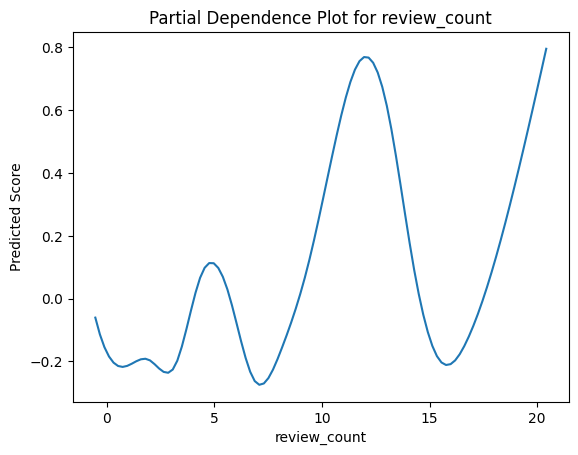

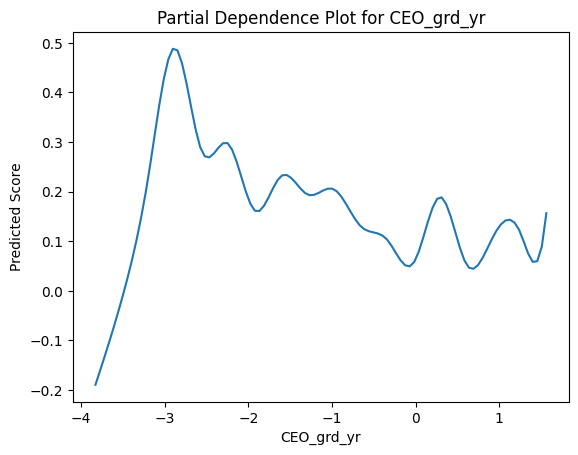

In [27]:
for i, term in enumerate(gam_model.terms):
    if term.isintercept:
        continue
    XX = gam_model.generate_X_grid(term=i)
    pdep, confi = gam_model.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    # plt.plot(XX[:, term.feature], confi[0][:, 0], c='grey', ls='--')
    # plt.plot(XX[:, term.feature], confi[0][:, 1], c='grey', ls='--')
    plt.title("Partial Dependence Plot for {}".format(X.columns[i]))
    plt.xlabel(X.columns[i])
    plt.ylabel("Predicted Score")
    plt.show()

# Model Comparison
# Evaluate Lasso regression model

In [29]:
y_pred_lasso = lasso_model.predict(X_test_scaled)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso Regression RMSE:", rmse_lasso)
print("Lasso Regression R-squared:", r2_lasso)

Lasso Regression RMSE: 1.0595505681348372
Lasso Regression R-squared: -0.0015608430285969366


# Evaluate GAM model


In [30]:
y_pred_gam = gam_model.predict(X_test_scaled)
rmse_gam = np.sqrt(mean_squared_error(y_test, y_pred_gam))
r2_gam = r2_score(y_test, y_pred_gam)
print("GAM RMSE:", rmse_gam)
print("GAM R-squared:", r2_gam)

GAM RMSE: 1.0590042244948752
GAM R-squared: -0.000528225359031298



1. **Insufficient Data or Information**: The dataset may not contain enough relevant features or information to effectively predict online business ratings. Consider gathering additional data or exploring other factors that could influence ratings.

2. **Model Complexity**: The models used (Lasso regression and GAM) might not be suitable for capturing the underlying relationships in the data. Experiment with different regression techniques or machine learning algorithms that can handle non-linear relationships more effectively.

3. **Feature Selection**: Revisit the process of selecting predictor variables for the models. Ensure that you're including features that have a meaningful impact on online business ratings and removing irrelevant or redundant variables.

4. **Data Preprocessing**: Pay attention to data preprocessing steps such as handling missing values, scaling features, and encoding categorical variables. These steps can significantly impact model performance.

5. **Model Hyperparameters**: Experiment with different hyperparameters for Lasso regression (e.g., adjusting the regularization parameter) and GAM (e.g., changing the spline degrees of freedom) to optimize model performance.

6. **Cross-Validation**: Ensure that you're using cross-validation effectively to prevent overfitting and to generalize better to unseen data.

7. **Model Evaluation Metrics**: Besides RMSE and R-squared, consider using other evaluation metrics such as Mean Absolute Error (MAE), explained variance, or precision-recall curves to gain a more comprehensive understanding of model performance.

8. **Data Quality**: Double-check the quality and consistency of the dataset. Outliers, data errors, or biases in the data can significantly impact model predictions.
